In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env
import sys
import seaborn as sns
sys.setrecursionlimit(10**6)

In [2]:

start = time.time()


count = 0

number_of_games = 800

action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }


actions_for_each_game = [0]*number_of_games
iterations_used_per_game = [0]*number_of_games
different_states_per_game = [0]*number_of_games

def greedy_policy(en,action_number,tot,action_freq,actions_matrix,game,fp_flag=False):
    
#     if action_number >= tot:
#         return False


    actions_m = []
    
    for step in range(tot):
        
        for action in range(6):
            
            won,taken = en.step(action,fp_flag)
            
             
            if won == True:
                action_freq[action]+=1
                actions_m.append(action)
                
                
                actions_matrix[game] = [game,actions_m,en.state] 
                return step,True
            if taken == True:
                action_freq[action]+=1
                actions_m.append(action)
                
                break

        if taken == False:
            
            actions_matrix[game] = [game,actions_m,en.state] 
            
            return step,False
        
       
    actions_matrix[game] = [game,actions_m,en.state] 
    
    
    
    return step,False
        
        
actions_matrix = [0]*number_of_games

start_states = {}

for this_game in tq.tqdm(range(number_of_games)):
    
    
    en = solitaire_env.env()
    tot = 20000
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    start_states[this_game] = en.state
    step,won = greedy_policy(en,1,tot,action_freq,actions_matrix,this_game,fp_flag=True)
             
        
    if won == True:
        count+=1
        
    actions_for_each_game[this_game] = action_freq
    different_states_per_game[this_game] = len(en.hashable_map.keys())
    iterations_used_per_game[this_game] = step
    
print((time.time()-start)/60)


89.18357143402099


In [3]:
count


12

In [4]:
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [5]:
it

19999    592
23        14
26        13
22        13
28        12
24        12
18        12
25        10
14        10
33         8
21         8
20         8
16         8
19         7
27         6
17         5
15         5
13         5
10         5
31         5
30         4
11         3
32         3
40         3
36         2
29         2
38         2
12         2
34         1
66         1
9          1
83         1
81         1
79         1
77         1
72         1
70         1
67         1
63         1
65         1
86         1
61         1
60         1
45         1
42         1
39         1
37         1
35         1
8          1
Name: iterations, dtype: int64

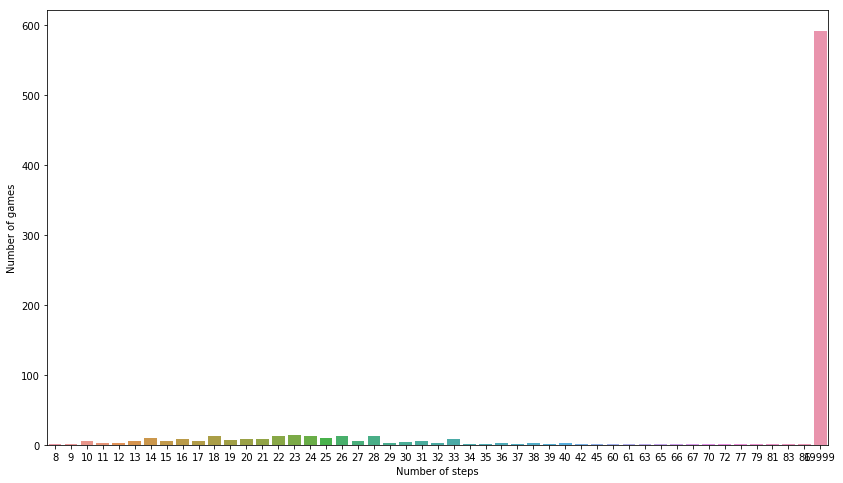

In [6]:
plt.figure(figsize=(14,8))
plt.xlabel("Number of steps")
plt.ylabel("Number of games")
sns.barplot(it.index,it.values)
plt.savefig("Foundation_Progression_included.jpg")

In [7]:

len(actions_matrix[0][1])

20000

In [8]:
action_count = [len(actions_matrix[i][1]) for i in range(number_of_games)]

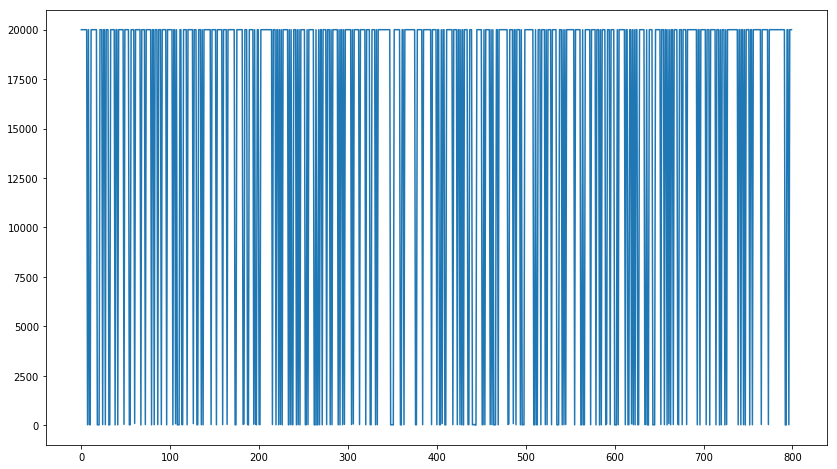

In [9]:
plt.figure(figsize=(14,8))
plt.plot(range(number_of_games),action_count)

In [10]:
actions_matrix.sort(key = lambda x:len(x[1]))

In [11]:
actions_matrix[0]

[707, [0, 1, 1, 1, 2, 3, 2, 0], <solitaire_env.state at 0x7f97b5867860>]

In [12]:
max_step_games = []
for i in range(number_of_games):
    if len(actions_matrix[i][1]) == tot:
        action_string = "".join([str(x) for  x in actions_matrix[i][1]])
        max_step_games.append([actions_matrix[i][0],action_string,actions_matrix[i][2]])
        

In [13]:
len(max_step_games)

592

In [14]:
k = 0
game_no, game_action_seq, game_end_state = max_step_games[k]

[10, 9996, 5, 8, 9981, 0]


<BarContainer object of 6 artists>

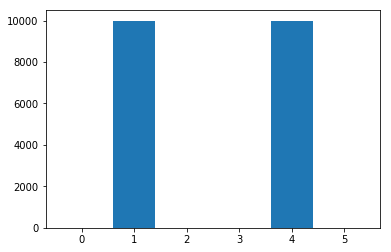

In [15]:

mp = actions_for_each_game[game_no]
values = [mp[i] for i in range(6)]
print(values)
plt.bar([0,1,2,3,4,5],values)

In [16]:
en.state = start_states[game_no]


## Start of game 

In [17]:
en.get_pile()

suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = heart      color = red        number =     7 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
suit = club       color = black      number =     9 speciality = None       face = up   
suit = club       color = black      number =    13 speciality = KING       face = up   
suit = diamond    color = red        number =     5 speciality = None       face = up   
suit = heart      color = red        number =     8 speciality = None       face = up   
suit = diamond    color = red        number =    13 speciality = KING       face = up   
suit = heart      color = red        number =     3 speciality = None       face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = spade      col

In [18]:
en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
printing foundation number 3 ********************
printing foundation number 4 ********************


In [19]:
en.get_tableau()

printing tableau number 1 ********************
suit = club       color = black      number =     5 speciality = None       face = up   
printing tableau number 2 ********************
suit = club       color = black      number =     1 speciality = ACE        face = down 
suit = club       color = black      number =    11 speciality = JACK       face = up   
printing tableau number 3 ********************
suit = spade      color = black      number =     8 speciality = None       face = down 
suit = diamond    color = red        number =     9 speciality = None       face = down 
suit = heart      color = red        number =     6 speciality = None       face = up   
printing tableau number 4 ********************
suit = spade      color = black      number =     6 speciality = None       face = down 
suit = diamond    color = red        number =    12 speciality = QUEEN      face = down 
suit = heart      color = red        number =     4 speciality = None       face = down 
suit = diam

## After taking n number of steps

In [20]:
this_game_actions = game_action_seq[:17]
print(this_game_actions)
count1 = 0
for c in this_game_actions:
    if c == '1':
        count1+=1
        
print(count1,len(this_game_actions)-count1)

00111221000120011
7 10


In [21]:
en.state = start_states[game_no]
for a in this_game_actions:
    action = int(a)
    w,t = en.step(action,fp_flag=True)

In [22]:
en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
suit = heart      color = red        number =     3 speciality = None       face = up   
suit = heart      color = red        number =     4 speciality = None       face = up   
printing foundation number 3 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
suit = diamond    color = red        number =     2 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
suit = diamond    color = red        number =    

In [23]:
en.get_pile()

suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = heart      color = red        number =     7 speciality = None       face = up   
suit = club       color = black      number =     9 speciality = None       face = up   
suit = club       color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =     8 speciality = None       face = up   
suit = diamond    color = red        number =    13 speciality = KING       face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
suit = spade      color = black      number =     4 speciality = None       face = up   
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = heart      col

In [24]:
en.get_tableau()

printing tableau number 1 ********************
suit = club       color = black      number =     5 speciality = None       face = up   
printing tableau number 2 ********************
printing tableau number 3 ********************
suit = spade      color = black      number =     8 speciality = None       face = down 
suit = diamond    color = red        number =     9 speciality = None       face = down 
suit = heart      color = red        number =     6 speciality = None       face = up   
printing tableau number 4 ********************
suit = spade      color = black      number =     6 speciality = None       face = down 
suit = diamond    color = red        number =    12 speciality = QUEEN      face = up   
suit = club       color = black      number =    11 speciality = JACK       face = up   
printing tableau number 5 ********************
suit = heart      color = red        number =     9 speciality = None       face = down 
suit = club       color = black      number =     7 s

## End state

In [25]:
end_en = solitaire_env.env()
end_en.state = game_end_state
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
suit = heart      color = red        number =     3 speciality = None       face = up   
suit = heart      color = red        number =     4 speciality = None       face = up   
suit = hea

In [26]:
end_en.get_pile()

suit = spade      color = black      number =     4 speciality = None       face = up   
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   


In [27]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
printing tableau number 2 ********************
suit = diamond    color = red        number =    13 speciality = KING       face = up   
suit = club       color = black      number =    12 speciality = QUEEN      face = up   
suit = heart      color = red        number =    11 speciality = JACK       face = up   
suit = club       color = black      number =    10 speciality = None       face = up   
printing tableau number 3 ********************
suit = spade      color = black      number =     8 speciality = None       face = up   
printing tableau number 4 ********************
suit = spade      color = black      number =     6 speciality = None       face = up   
printing ta

## Check result of single action

In [28]:
e1 = end_en.state
w,t = end_en.step(4,fp_flag=True)

In [29]:
w,t

(False, True)

In [30]:
len(end_en.state.pile)

5

In [31]:
end_en.get_pile()

suit = spade      color = black      number =     4 speciality = None       face = up   
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   


In [32]:
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
suit = heart      color = red        number =     3 speciality = None       face = up   
suit = heart      color = red        number =     4 speciality = None       face = up   
suit = hea

In [33]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
printing tableau number 2 ********************
suit = diamond    color = red        number =    13 speciality = KING       face = up   
suit = club       color = black      number =    12 speciality = QUEEN      face = up   
suit = heart      color = red        number =    11 speciality = JACK       face = up   
suit = club       color = black      number =    10 speciality = None       face = up   
printing tableau number 3 ********************
suit = spade      color = black      number =     8 speciality = None       face = up   
printing tableau number 4 ********************
suit = spade      color = black      number =     6 speciality = None       face = up   
printing ta

In [34]:
e2 = end_en.state

#### Second Action

In [35]:
w,t = end_en.step(1,fp_flag=True)

In [36]:
w,t

(False, True)

In [37]:
end_en.get_pile()

suit = spade      color = black      number =     4 speciality = None       face = up   
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   


In [38]:
end_en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
suit = club       color = black      number =     2 speciality = None       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = club       color = black      number =     4 speciality = None       face = up   
suit = club       color = black      number =     5 speciality = None       face = up   
suit = club       color = black      number =     6 speciality = None       face = up   
printing foundation number 2 ********************
suit = heart      color = red        number =     1 speciality = ACE        face = up   
suit = heart      color = red        number =     2 speciality = None       face = up   
suit = heart      color = red        number =     3 speciality = None       face = up   
suit = heart      color = red        number =     4 speciality = None       face = up   
suit = hea

In [39]:
end_en.get_tableau()

printing tableau number 1 ********************
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
printing tableau number 2 ********************
suit = diamond    color = red        number =    13 speciality = KING       face = up   
suit = club       color = black      number =    12 speciality = QUEEN      face = up   
suit = heart      color = red        number =    11 speciality = JACK       face = up   
suit = club       color = black      number =    10 speciality = None       face = up   
printing tableau number 3 ********************
suit = spade      color = black      number =     8 speciality = None       face = up   
printing tableau number 4 ********************
suit = spade      color = black      number =     6 speciality = None       face = up   
printing ta

In [40]:
e3 = end_en.state

In [41]:
def compare_states(state1,state2):

    def compare_cards(card1,card2):
        
        if card1.number == card2.number and card1.face == card2.face and card1.suit == card2.suit:
            return True
        
        return False
    
    
    def check_pile(p1,p2):

        if len(p1) != len(p2):
            return False

        for cd1,cd2 in zip(p1,p2):
            
            if compare_cards(cd1,cd2) is False:
                return False
            
            
        return True
    
    def check_tableau(t1,t2):
        
        for i in range(7):
            if len(t1[i]) != len(t2[i]):
                return False
            for cd1,cd2 in zip(t1[i],t2[i]):
                if compare_cards(cd1,cd2) is False:
                    return False
    
        return True
    
    def check_foundation(f1,f2):
        
        for i in range(4):
                if len(f1[i]) != len(f2[i]):
                    return False
                for cd1,cd2 in zip(f1[i],f2[i]):
                    if compare_cards(cd1,cd2) is False:
                        return False

        return True
    
    
    
    comp =  check_foundation(state1.foundation,state2.foundation) and check_pile(state1.pile,state2.pile) and \
            check_tableau(state1.tableau,state2.tableau)
    
    return comp

In [42]:
compare_states(e1,e3)

True

In [43]:
temp_en = solitaire_env.env()
temp_en.state = e1
temp_en.step(4,fp_flag=True)
temp_en.step(1,fp_flag=True)
e4 = temp_en.state
compare_states(e1,e4)

True

In [44]:
import pickle as pkl

In [50]:
name = "games/run_" + str(pd.Timestamp.now()) +".pkl"

In [51]:
run_data = {
    "start_states":start_states,
    "actions_matrix":actions_matrix,
    "actions_for_each_game":actions_for_each_game,
    "different_states_per_game":different_states_per_game,
    "iterations_used_per_game":iterations_used_per_game
}

In [ ]:
with open(name,"wb") as file:
    pkl.dump(run_data,file)

In [48]:
temp_en = solitaire_env.env()
temp_en.state = e1
temp_en.get_pile()
print('***************************************************************************************************')
temp_en.get_tableau()
print("***************************************************************************************************")
temp_en.get_foundation()
# temp_en.step(4,fp_flag=True)
# temp_en.step(1,fp_flag=True)
# e4 = temp_en.state
# compare_states(e1,e4)

suit = spade      color = black      number =     4 speciality = None       face = up   
suit = spade      color = black      number =     5 speciality = None       face = up   
suit = spade      color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
***************************************************************************************************
printing tableau number 1 ********************
suit = spade      color = black      number =    13 speciality = KING       face = up   
suit = heart      color = red        number =    12 speciality = QUEEN      face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
printing tableau number 2 ********************
suit = diamond    color = red        number =    13 speciality = KING       face = up   
suit 

In [49]:
temp_en.generate_hashable_state(e1)

((<solitaire_env.card at 0x7f97ae9ccbe0>,
  <solitaire_env.card at 0x7f97ae9cccc0>),
 (<solitaire_env.card at 0x7f97ae9cccf8>,
  <solitaire_env.card at 0x7f97ae9ccd68>),
 (<solitaire_env.card at 0x7f97ae9ccda0>,
  <solitaire_env.card at 0x7f97ae9cce48>),
 (<solitaire_env.card at 0x7f97ae9cce80>,),
 (<solitaire_env.card at 0x7f97ae9cceb8>,),
 (<solitaire_env.card at 0x7f97ae9ccef0>,
  <solitaire_env.card at 0x7f97ae9ccf60>),
 (<solitaire_env.card at 0x7f97ae9ccf98>,
  <solitaire_env.card at 0x7f97ae9ce0b8>),
 (<solitaire_env.card at 0x7f97ae9ce128>,
  <solitaire_env.card at 0x7f97ae9ce208>),
 (<solitaire_env.card at 0x7f97ae9ce240>,
  <solitaire_env.card at 0x7f97ae9ce358>),
 (<solitaire_env.card at 0x7f97ae9ce390>,
  <solitaire_env.card at 0x7f97ae9ce0f0>),
 (<solitaire_env.card at 0x7f97ae9ce518>,
  <solitaire_env.card at 0x7f97ae9ce748>),
 ())